In [63]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt


In [64]:
def matrix_sum(m1,m2):
    sum = 0
    for i in range(m1.shape[0]):
        for j in range(m1.shape[1]):
            sum = sum + m1[i][j] * m2[i][j]
    return sum

In [65]:
def filter_operation(image,kernel):
    kernel_center = (kernel.shape[0]-1)//2
    kernel_dimension = kernel.shape[0]
    image_height = image.shape[0]
    image_width = image.shape[1]
    out_image_height = int(image_height-2*kernel_center)
    out_image_width = int(image_width-2*kernel_center)
    out_image = np.zeros((out_image_height,out_image_width))
    
    for row in range(out_image_height):
        for column in range(out_image_width):
            mat = image[row:row+kernel_dimension,column:column+kernel_dimension]
            out_image[row,column] = matrix_sum(mat,kernel)/kernel_dimension/kernel_dimension

    return out_image

In [66]:
arr = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [67]:
arr[0:3,0:3]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [68]:
arr1 = np.ones_like(arr)

In [69]:
matrix_sum(arr,arr1)

136

In [70]:
kernel = np.ones((3,3))

In [71]:
kernel.shape

(3, 3)

In [72]:
filter_operation(arr,kernel)

array([[ 6.,  7.],
       [10., 11.]])

In [73]:
# kernel = np.zeros((3,3))
# kernel = kernel + 1/255
#point detection
#kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
#line detection
#kernel = np.array([[-1,-1,-1],[0,0,0],[-1,-1,-1]])
#sharpening kernel
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
#blur kernel
#kernel = np.ones((3,3))/9
#gaussian blur
#kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

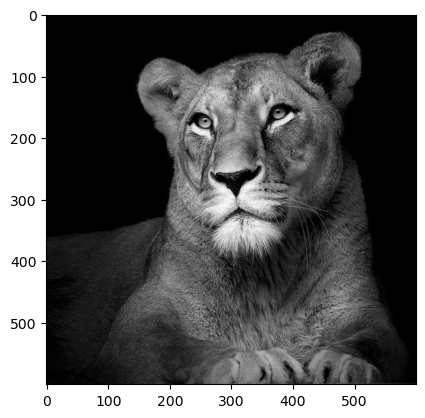

In [74]:
image = cv2.imread("lion.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

In [75]:
filtered_image = filter_operation(image,kernel)

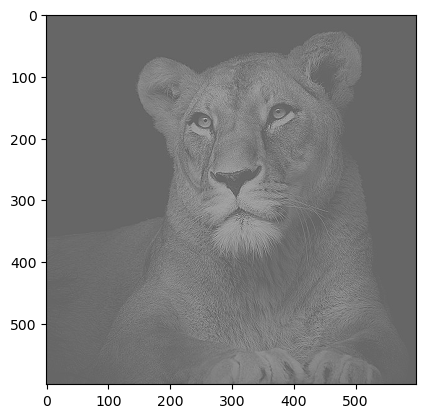

In [76]:
plt.imshow(filtered_image, cmap="gray")

In [77]:
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])